In [1]:
import numpy as np
import phate
from heatgeo.embedding import HeatGeo
import scprep
from scipy.spatial.distance import pdist, squareform
import demap


In [5]:
# data = np.load("/gpfs/gibbs/pi/krishnaswamy_smita/dl2282/dmae/data/swiss_roll_1.0.npz")
data = np.load("/gpfs/gibbs/pi/krishnaswamy_smita/dl2282/dmae/data/swiss_roll_noise0.1.npz")
# data = np.load("/gpfs/gibbs/pi/krishnaswamy_smita/dl2282/dmae/data/s_curve_noise0.1.npz")

In [6]:
data.files

['data_gt', 'data', 'colors', 'is_train']

In [4]:
x = data['data']
color = data['colors']

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes3D: >

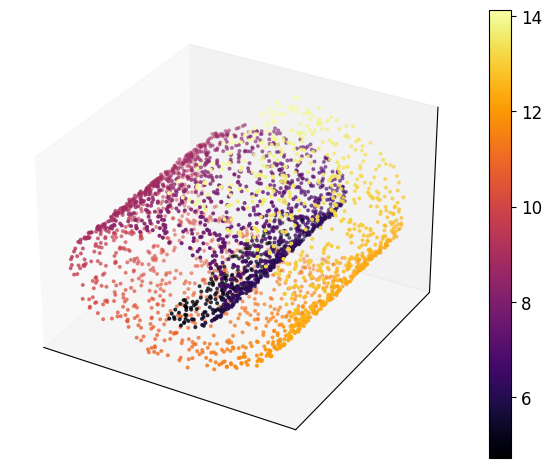

In [5]:
scprep.plot.scatter3d(x, c=color, ticks=False)

In [6]:
phate_op = phate.PHATE(knn=40, t=26, n_landmark=5000)
x_phate = phate_op.fit_transform(x)

Calculating PHATE...
  Running PHATE on 3000 observations and 3 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.26 seconds.
    Calculating affinities...
    Calculated affinities in 0.12 seconds.
  Calculated graph and diffusion operator in 0.40 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 8.90 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 23.93 seconds.
Calculated PHATE in 33.34 seconds.


/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'PHATE knn=40, t=26'}>

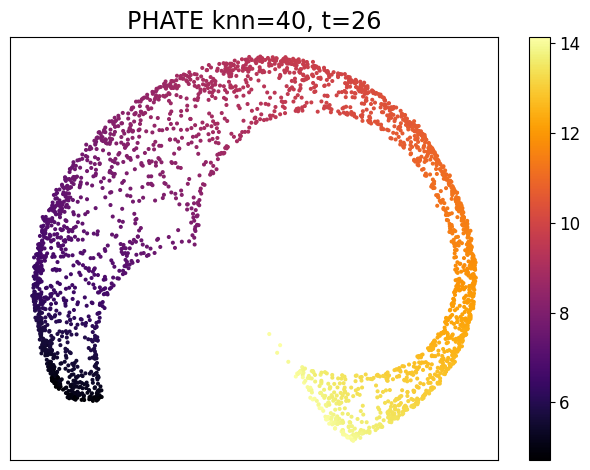

In [7]:
scprep.plot.scatter2d(x_phate, c=color, ticks=False, title=f"PHATE knn=40, t=26")

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/graphtools/base.py:165: RuntimeWarning: Cannot perform PCA to 40 dimensions on data with min(n_samples, n_features) = 3
  warnings.warn(


Using s_gd2 for MDS. None


/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: >

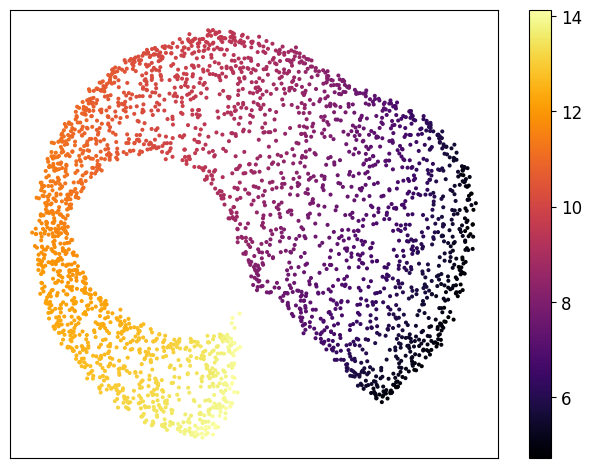

In [8]:
emb_op = HeatGeo(knn=40)
# emb_op = HeatGeo(knn=5)
emb = emb_op.fit_transform(x)
scprep.plot.scatter2d(emb, ticks=False, c=color)

In [7]:
data_dict = {file: data[file] for file in data.files}

In [10]:
data_dict['phate'] = x_phate
phate_dist = squareform(pdist(phate_op.diff_potential))
data_dict['dist'] = phate_dist
np.savez("../data/swissroll0.1_phate.npz", **data_dict)

In [11]:
# diff_op_t = np.linalg.matrix_power(phate_op.diff_op, phate_op.t)
# diff_op_t = diff_op_t + 1e-7
# diff_potential = -1 * np.log(diff_op_t)

In [12]:
data_dict2 = data_dict.copy()
data_dict2['dist'] = emb_op.dist
data_dict2['phate'] = emb
np.savez('../data/swissroll0.1_heatgeo.npz', **data_dict2)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'PHATE knn=40, t=26, DEMaP=0.94'}>

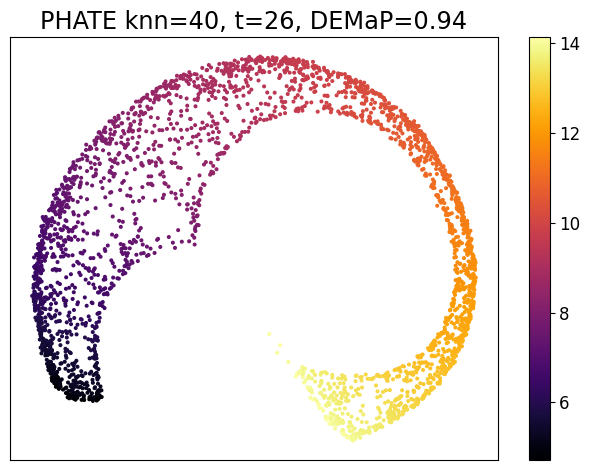

In [13]:
val = demap.DEMaP(data['data_gt'], x_phate)
val = np.round(val, 3)
scprep.plot.scatter2d(x_phate, c=color, ticks=False, title=f"PHATE knn=40, t=26, DEMaP={val}")

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'HeatGeo knn=40, DEMaP=0.932'}>

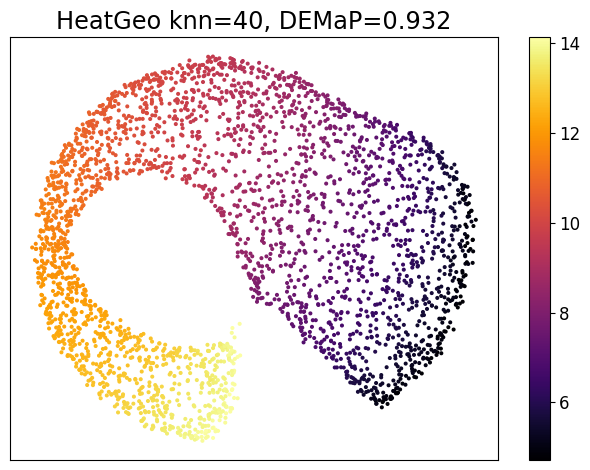

In [14]:
val = demap.DEMaP(data['data_gt'], emb)
val = np.round(val, 3)
scprep.plot.scatter2d(emb, c=color, ticks=False, title=f"HeatGeo knn=40, DEMaP={val}")

In [15]:
# weights = np.exp(-phate_dist * 1/ phate_dist.std())

In [16]:
# scprep.plot.scatter2d(x_phate, c=(phate_dist)[21,:], ticks=False)

In [17]:
scprep.plot.scatter2d(x_phate, c=(weights)[21,:], ticks=False)

NameError: name 'weights' is not defined

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: >

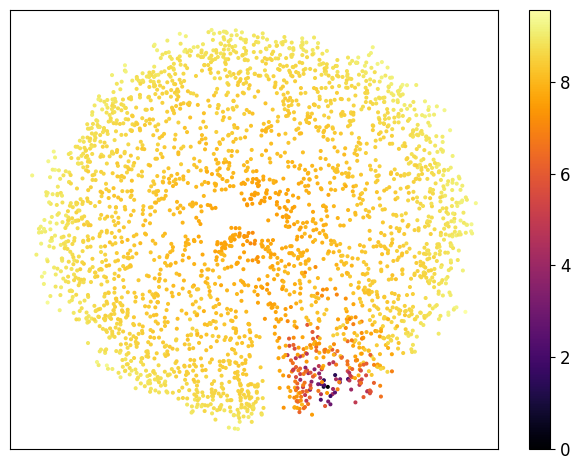

In [ ]:
scprep.plot.scatter2d(x_phate, c=phate_dist2[21,:], ticks=False)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: >

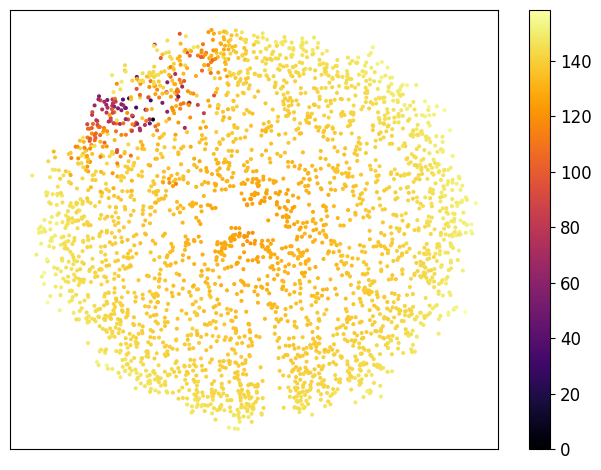

In [ ]:
scprep.plot.scatter2d(x_phate, c=phate_dist[0,:], ticks=False)

In [1]:
import numpy as np

In [9]:
data = np.load('../data/swissroll1.0_phate.npz')

In [10]:
data.files

['data_gt', 'data', 'colors', 'is_train', 'phate', 'dist']

In [14]:
data['data'].std(axis=0)

array([6.76380792, 6.23357378, 7.06691746])